In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) #zipping or pairng the lat and lads together 
lat_lngs

#output is a zip object memory 

#unpacking the zip 
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-82.45721495794045, 61.568222232864855), (-3.4587359443390255, 37.27611608580659), (76.31498000728291, -168.79328131436736), (-30.357023948628637, -26.790298494074477), (-22.604374953779114, -162.23752051093268), (-65.0997908507546, 50.49611585541635), (-35.489809927167514, 131.59097437229298), (-9.327594917288181, -31.12087678981908), (63.949522865681615, 160.44472329578633), (-16.507975246191904, 74.65774538756023), (66.58892841257924, -118.36022663991402), (-6.891479916573019, 167.1968699197929), (-76.98155024424801, 155.90807312957463), (-59.45181908918855, 164.6041777755982), (-18.668479884330907, -30.457967837321604), (23.142240638460365, 37.41429855365695), (51.77054667076692, 70.72634044491033), (-33.00119662135577, 159.94867747728262), (-58.94528654473763, 50.83137614376085), (8.031521010557327, -105.78366776091353), (-41.04040224028567, 15.013679114476872), (38.87916178712058, -8.625901999521744), (25.914311293762538, 13.081792657072668), (20.302988053451486, 133.1374595694

In [3]:
#Section 6.1.5 Generate random world cities
from citipy import citipy

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)



taolanaro mg
moshi tz
lavrentiya ru
sao joao da barra br
avarua ck
east london za
flinders au
olinda br
evensk ru
hithadhoo mv
yellowknife ca
lata sb
bluff nz
bluff nz
caravelas br
umm lajj sa
alekseyevka kz
port macquarie au
tsihombe mg
ixtapa mx
hermanus za
coruche pt
awbari ly
nishihara jp
butaritari ki
upernavik gl
saint-philippe re
mangit uz
lagoa pt
madang pg
oyama jp
qaanaaq gl
avarua ck
port alfred za
sambava mg
dryden ca
husavik is
atuona pf
atuona pf
sirjan ir
vaini to
grand gaube mu
ponta delgada pt
ushuaia ar
kruisfontein za
butaritari ki
taolanaro mg
jamestown sh
kuryk kz
zhengjiatun cn
rikitea pf
ushuaia ar
bredasdorp za
east london za
ruteng id
atuona pf
carnarvon au
rikitea pf
sao joao da barra br
fort nelson ca
tazovskiy ru
victoria sc
mahebourg mu
vardo no
rikitea pf
kaitangata nz
bethel us
benguela ao
rikitea pf
victoria sc
kruisfontein za
polunochnoye ru
tuktoyaktuk ca
codrington ag
tidore id
bengkulu id
hobart au
tefe br
nizwa om
butaritari ki
lazaro cardenas mx
bl

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
#Section 6.2.6 Get the City Weather Data 

#1. import dependecies:
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#query_url = url + "appid" + weather_api_key + "&q" + cities

#2. declare an empty list: 
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 
#initialized the counters at 1 b/c we want the 1st iteration of the logging for each recorded response and set to start at 1 

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list. 
# Enumerate() an alternative way to iterate thru the list of cities and retrieve both the index and city from the list 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): ####ask LIMEI about what this does 
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | moshi
Processing Record 3 of Set 13 | lavrentiya
Processing Record 4 of Set 13 | sao joao da barra
Processing Record 5 of Set 13 | avarua
Processing Record 6 of Set 13 | east london
Processing Record 7 of Set 13 | flinders
Processing Record 8 of Set 13 | olinda
Processing Record 9 of Set 13 | evensk
Processing Record 10 of Set 13 | hithadhoo
Processing Record 11 of Set 13 | yellowknife
Processing Record 12 of Set 13 | lata
Processing Record 13 of Set 13 | bluff
Processing Record 14 of Set 13 | caravelas
Processing Record 15 of Set 13 | umm lajj
Processing Record 16 of Set 13 | alekseyevka
Processing Record 17 of Set 13 | port macquarie
Processing Record 18 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 13 | ixtapa
Processing Record 20 of Set 13 | hermanus
Processing Record 21 of Set 13 | coruche
P

In [6]:
#city_weather

In [7]:
#Section 6.2.7 Create ad DF of the City Weather Data 
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moshi,-3.3500,37.3333,66.38,76,70,1.86,TZ,2021-10-17 01:20:36
1,Lavrentiya,65.5833,-171.0000,29.26,76,100,21.23,RU,2021-10-17 01:20:37
2,Sao Joao Da Barra,-21.6403,-41.0511,73.89,93,100,11.92,BR,2021-10-17 01:20:37
3,Avarua,-21.2078,-159.7750,82.45,74,75,8.05,CK,2021-10-17 01:20:38
4,East London,-33.0153,27.9116,56.70,54,1,19.37,ZA,2021-10-17 01:20:38
5,Flinders,-34.5833,150.8552,71.19,51,8,5.99,AU,2021-10-17 01:20:39
6,Olinda,-8.0089,-34.8553,80.33,74,40,10.36,BR,2021-10-17 01:20:39
7,Evensk,61.9500,159.2333,19.76,52,100,6.02,RU,2021-10-17 01:20:40
8,Hithadhoo,-0.6000,73.0833,82.90,76,100,17.05,MV,2021-10-17 01:20:40
9,Yellowknife,62.4560,-114.3525,34.41,100,90,5.75,CA,2021-10-17 01:16:03


In [8]:
#Reordering the columns: 
#format = new_column_order = ['column2', 'column4', 'column1']
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
new_city_data_df = city_data_df[new_column_order]
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moshi,TZ,2021-10-17 01:20:36,-3.3500,37.3333,66.38,76,70,1.86
1,Lavrentiya,RU,2021-10-17 01:20:37,65.5833,-171.0000,29.26,76,100,21.23
2,Sao Joao Da Barra,BR,2021-10-17 01:20:37,-21.6403,-41.0511,73.89,93,100,11.92
3,Avarua,CK,2021-10-17 01:20:38,-21.2078,-159.7750,82.45,74,75,8.05
4,East London,ZA,2021-10-17 01:20:38,-33.0153,27.9116,56.70,54,1,19.37
...,...,...,...,...,...,...,...,...,...
574,Marsh Harbour,BS,2021-10-17 01:24:42,26.5412,-77.0636,80.51,68,9,9.82
575,Chunhuhub,MX,2021-10-17 01:21:21,19.5500,-88.6833,74.35,94,79,2.19
576,Shimoda,JP,2021-10-17 01:24:43,34.6667,138.9500,64.76,80,100,12.08
577,Thyboron,DK,2021-10-17 01:24:43,56.6985,8.2124,50.14,75,100,17.52


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
#.to_csv creates a csv file and stores it in the out_put_data_file that we have created 

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

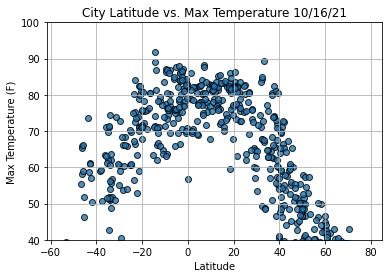

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylim(40,100,10) #changing the y limits 
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

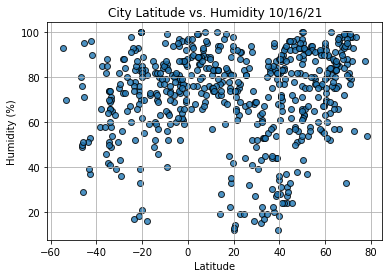

In [13]:
#Section 6.3.2 Lat v humidity 
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

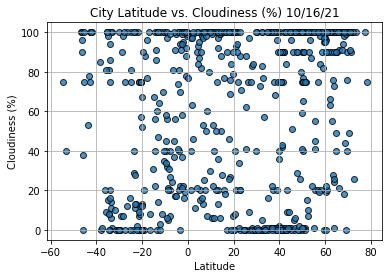

In [14]:
#Section 6.3.3 Lat. vs cloudiness 
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

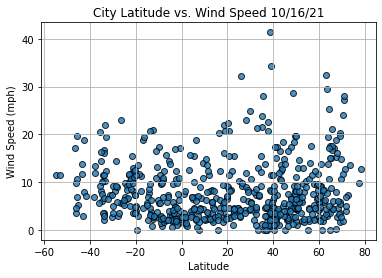

In [15]:
#Section 6.3.4 Lat v wind speed 
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()